In [24]:
import numpy as np
import pickle
import pandas as pd
import umap.plot
import umap.umap_ as umapp
import h5py

import seaborn as sns

In [11]:
raw_embeddings = h5py.File("../../data/embeddings.h5", "r")
with open("../../data/seq_anno_hash.pickle", 'rb') as handle:
    proteins_and_hashes = pickle.load(handle)

label_prot = pd.read_csv("../data_splits/train_prot_id_labels.csv")

In [6]:
label_prot.iterrows()

<generator object DataFrame.iterrows at 0x7ff590893510>

In [12]:
embeddings = list()
labels = list()
protein_ids = list()
for index, row in label_prot.iterrows():
    hash_code = proteins_and_hashes[row["label"]][row["prot_id"]][2]
    mean_embedding = np.mean(raw_embeddings.get(hash_code), axis=0)
    label = row["label"]
    id = row["prot_id"]
    embeddings.append(mean_embedding)
    labels.append(label)
    protein_ids.append(id)

In [13]:
df = pd.DataFrame(embeddings)
df["labels"] = labels

<AxesSubplot:>

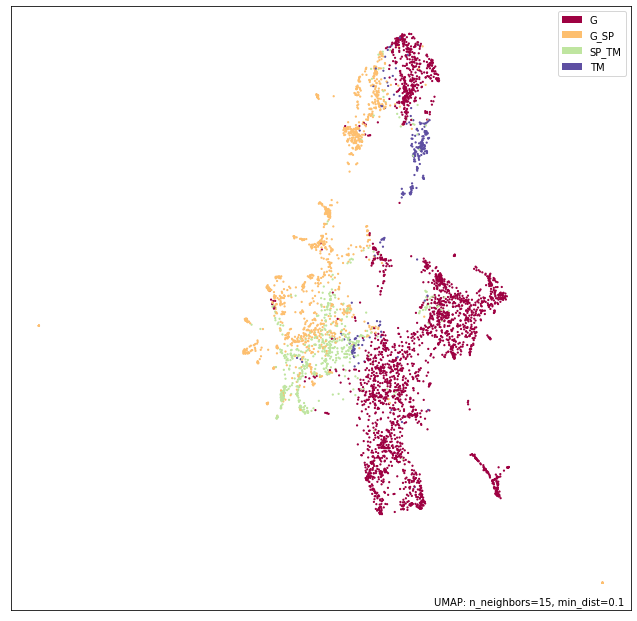

In [20]:
mapper = umapp.UMAP().fit(df.drop("labels", axis=1))
umap.plot.points(mapper, labels=df.labels)

<AxesSubplot:>

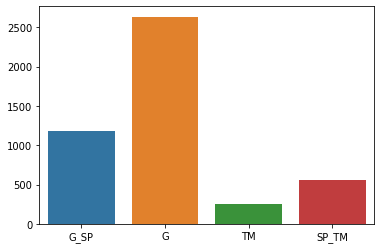

In [28]:
from collections import Counter
label_dist = Counter(label_prot["label"])

keys = list(label_dist.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(label_dist[k]) for k in keys]
sns.barplot(x=keys, y=vals)